Constraint Satisfaction Algorithms on Sudoku Puzzle. 

The dataset is used from Kaggle. The difficulty level of the sudoku puzzles are different, starting from level 0 to 8.5. So, I have randomly took 10 puzzles from level 1 to 4 and named them as "Easy" and the same number of puzzles from level 6 to 8 as "Hard". Now we have 20 random puzzles with easy and hard solutions. Let's apply different algorithms and compare their time to find which one performs better in what type of problem. 

In [ ]:
#to download the dataset
#https://www.kaggle.com/code/radcliffe/exploring-the-3m-sudoku-puzzle-dataset/notebook
import numpy as np 
import pandas as pd
path = '/content/drive/MyDrive/sudoku-3m.csv'
df = pd.read_csv(path)
df.head()




,id,puzzle,solution,clues,difficulty
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1


The below code is just a representation of how a puzzle looks like in the dataset. After we know the format, we will have to check or modify the format to a list to use it in different algorithms. 

In [ ]:
#format of first puzzle
def view_grid(puzzle_string):
    return pd.DataFrame(np.array(list(puzzle_string.replace('.', ' '))).reshape((9, 9)))

view_grid(df.puzzle[0]) 



,0,1,2,3,4,5,6,7,8
0,1,,,5,,3,7,,
1,6,,3,,,8,,9,
2,,,,,,9,8,,
3,,1,,,,,,,
4,8,7,6,1,,,,,
5,,,,,,6,,,
6,,,,,,,,,7
7,,8,,9,,7,6,,4
8,7,,,,6,,3,1,2


In [ ]:
# To convert the input string from the .csv file into the usable format used by our code.
def convertPuzzleFormat(s):
  puzzle=list()
  temp=[]
  for i,j in enumerate(s):
    i+=1
    if(i%9!=0):
      if(j=='.'):
        temp.append(0)
      else:
        temp.append(int(j))
    else:
      if(j=='.'):
        temp.append(0)
      else:
        temp.append(int(j))
      puzzle.append(temp)
      temp=[]   
  return puzzle 
  #print(puzzle)
#print(convertPuzzleFormat(df.puzzle[0]))

Now, that we know what a puzzle looks like in the dataset, we have converted that into a usable format of set of lists like below:

puzzle = [    [0, 0, 0, 6, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 7, 5, 0, 0, 0],
    [0, 9, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]


Let us choose our 10 set of puzzles each from levels 1-4 and 6-8. 



In [ ]:
# Make two lists easy and hard for the Sudoku puzzles which will store 1-4 level as easy  and 6-8 level as hard from the file read above
# and the stored format will be after converting the convertPuzzleFormat
easy=[]
hard=[]
def Seperation():
  for i,j in enumerate(df.difficulty):
    if(j>=1 and j<=4 and len(easy)<=9):
      easy.append(convertPuzzleFormat(df.puzzle[i]))
    elif(j>=6 and j<=8 and len(hard)<=9):
      hard.append(convertPuzzleFormat(df.puzzle[i]))

#print(easy)
Seperation()
# For Visualization creating a couple of dictionaries


In [ ]:
print(len(easy))
print(len(hard))
print(easy[0])

Backtracking

Each cell is tested for a valid number, moving "back" when there is a violation, and moving forward again until the puzzle is solved.

In [ ]:
#backtracking 
BTIteration=0
def solve_sudoku(grid):
    """
    Solves a Sudoku puzzle using backtracking.

    :param grid: A list of lists representing the Sudoku grid.
    :return: True if the Sudoku puzzle is solved, False otherwise.
    """
    global BTIteration
    # Find the next empty cell in the grid
    row, col = find_empty_cell(grid)

    # If all cells are filled, the puzzle is solved
    if row is None:
        return grid

    # Try all possible values for the empty cell
    for value in range(1, 10):
        if is_valid(grid, row, col, value):
            # If the value is valid, add it to the grid
            BTIteration+=1
            grid[row][col] = value

            # Recursively try to solve the puzzle
            if solve_sudoku(grid):
                return grid

            # If the puzzle can't be solved with the current value, backtrack
            BTIteration+=1
            grid[row][col] = 0
            

    # If no value works, the puzzle can't be solved
    return False


def find_empty_cell(grid):
    """
    Finds the next empty cell in the grid.

    :param grid: A list of lists representing the Sudoku grid.
    :return: A tuple representing the row and column indices of the next empty cell, or (None, None) if there are no empty cells.
    """
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                return row, col
    return None, None


def is_valid(grid, row, col, value):
    """
    Checks if the given value is valid for the cell at the given row and column indices.

    :param grid: A list of lists representing the Sudoku grid.
    :param row: An integer representing the row index.
    :param col: An integer representing the column index.
    :param value: An integer representing the value to check.
    :return: True if the value is valid, False otherwise.
    """
    # Check if the value is already in the row
    if value in grid[row]:
        return False

    # Check if the value is already in the column
    if value in [grid[i][col] for i in range(9)]:
        return False

    # Check if the value is already in the 3x3 box
    box_row = (row // 3) * 3
    box_col = (col // 3) * 3
    if value in [grid[r][c] for r in range(box_row, box_row + 3) for c in range(box_col, box_col + 3)]:
        return False

    # If the value is not already in the row, column, or box, it is valid
    return True


# This is to print the nmber of Iterations
def printIterationBT():
  print("The number of Iterations for BackTracking= ",BTIteration)



Now that we have solved the puzzle, we need to calculate the time and iterations for our solution for comparison. 

In [ ]:
import time
# Now using the dataset for easy , do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVE=[]
x=0
for i in easy:
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  solution = solve_sudoku(i)
  end_time = time.time()

  # Print the solution
  print("\n\nFor Easy Solution\n")
  if solution:
      for row in solution:
          print(row)
  else:
      print("No solution found.")
      # printing the time
  timeVE.append(round(end_time - start_time,6))
  print("Time taken:",timeVE[x] , "seconds")
  x+=1
  printIterationBT()
print(timeVE)



For Easy Solution

[1, 9, 8, 5, 4, 3, 7, 2, 6]
[6, 4, 3, 2, 7, 8, 5, 9, 1]
[5, 2, 7, 6, 1, 9, 8, 4, 3]
[9, 1, 4, 7, 3, 5, 2, 6, 8]
[8, 7, 6, 1, 9, 2, 4, 3, 5]
[2, 3, 5, 4, 8, 6, 1, 7, 9]
[4, 6, 2, 3, 5, 1, 9, 8, 7]
[3, 8, 1, 9, 2, 7, 6, 5, 4]
[7, 5, 9, 8, 6, 4, 3, 1, 2]
Time taken: 1.7e-05 seconds
The number of Iterations for BackTracking=  0


For Easy Solution

[2, 1, 5, 9, 8, 3, 7, 4, 6]
[3, 8, 7, 6, 5, 4, 2, 1, 9]
[4, 6, 9, 2, 7, 1, 3, 8, 5]
[5, 3, 8, 7, 1, 6, 9, 2, 4]
[9, 4, 1, 3, 2, 5, 8, 6, 7]
[7, 2, 6, 8, 4, 9, 5, 3, 1]
[6, 5, 3, 1, 9, 8, 4, 7, 2]
[1, 9, 2, 4, 3, 7, 6, 5, 8]
[8, 7, 4, 5, 6, 2, 1, 9, 3]
Time taken: 1.6e-05 seconds
The number of Iterations for BackTracking=  0


For Easy Solution

[4, 7, 3, 8, 1, 6, 9, 2, 5]
[6, 2, 8, 5, 3, 9, 7, 4, 1]
[1, 9, 5, 4, 2, 7, 8, 6, 3]
[7, 3, 2, 9, 4, 8, 1, 5, 6]
[9, 4, 1, 3, 6, 5, 2, 7, 8]
[5, 8, 6, 1, 7, 2, 4, 3, 9]
[2, 1, 7, 6, 9, 3, 5, 8, 4]
[8, 6, 4, 2, 5, 1, 3, 9, 7]
[3, 5, 9, 7, 8, 4, 6, 1, 2]
Time taken: 1.5e-05 seconds
The n

In [ ]:
import time
# Now using the dataset for hard , do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVH=[]
x=0
for i in hard:
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  solution = solve_sudoku(i)
  end_time = time.time()

  # Print the solution
  print("\n\nFor Hard Solution\n")
  if solution:
      for row in solution:
          print(row)
  else:
      print("No solution found.")
      # printing the time
  timeVH.append(round(end_time - start_time,6))
  print("Time taken:",timeVH[x] , "seconds")
  x+=1
  printIterationBT()

print(timeVH)



For Hard Solution

[4, 5, 9, 1, 2, 7, 8, 6, 3]
[7, 3, 6, 4, 8, 9, 2, 1, 5]
[8, 2, 1, 5, 3, 6, 4, 7, 9]
[1, 8, 4, 7, 9, 5, 3, 2, 6]
[9, 7, 2, 3, 6, 1, 5, 8, 4]
[3, 6, 5, 8, 4, 2, 7, 9, 1]
[6, 9, 7, 2, 5, 4, 1, 3, 8]
[2, 4, 8, 6, 1, 3, 9, 5, 7]
[5, 1, 3, 9, 7, 8, 6, 4, 2]
Time taken: 1.8e-05 seconds
The number of Iterations for BackTracking=  0


For Hard Solution

[4, 5, 1, 2, 6, 8, 7, 9, 3]
[6, 3, 9, 4, 7, 5, 1, 2, 8]
[2, 8, 7, 3, 9, 1, 4, 5, 6]
[9, 7, 6, 8, 4, 2, 3, 1, 5]
[1, 2, 8, 6, 5, 3, 9, 4, 7]
[3, 4, 5, 7, 1, 9, 6, 8, 2]
[7, 1, 2, 5, 3, 4, 8, 6, 9]
[8, 9, 3, 1, 2, 6, 5, 7, 4]
[5, 6, 4, 9, 8, 7, 2, 3, 1]
Time taken: 1.8e-05 seconds
The number of Iterations for BackTracking=  0


For Hard Solution

[5, 4, 3, 8, 2, 9, 7, 6, 1]
[1, 2, 8, 7, 6, 5, 9, 4, 3]
[9, 6, 7, 1, 3, 4, 2, 8, 5]
[2, 3, 4, 9, 8, 1, 5, 7, 6]
[6, 5, 1, 4, 7, 2, 3, 9, 8]
[8, 7, 9, 6, 5, 3, 4, 1, 2]
[4, 8, 2, 5, 1, 7, 6, 3, 9]
[7, 1, 5, 3, 9, 6, 8, 2, 4]
[3, 9, 6, 2, 4, 8, 1, 5, 7]
Time taken: 1.5e-05 seconds
The n

10


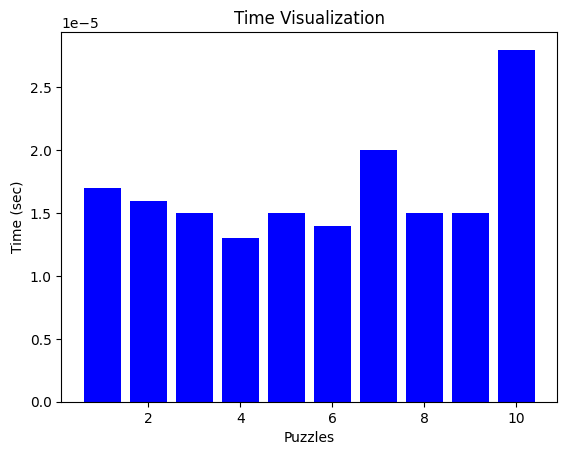

10


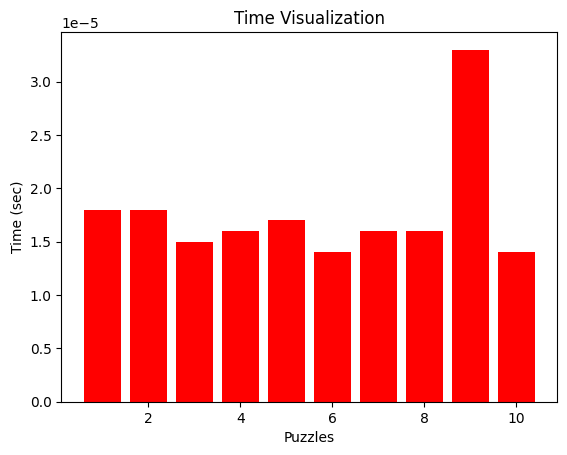

In [ ]:

from matplotlib import pyplot as plt
import numpy 
def VisualizeTime(timeV,color):
  bins=[] 
  for i in range(1,11):
    bins.append(i)

  print(len(bins))

  plt.bar(bins, timeV,color=color)
  plt.title('Time Visualization')
  plt.xlabel('Puzzles')
  plt.ylabel('Time (sec)')
  plt.show()


VisualizeTime(timeVE,'blue')
VisualizeTime(timeVH,'red')

BackTracking with Forward Jumping

We create a function 'forward_jumping' that will perform the forward jumping step, finding the next empty cell with the fewest possible values and trying each possible value for the cell. However, when the puzzle cannot be solved from a certain cell, the function will backtrack and try the next value.

In [ ]:
# forward jumping main
ForwardIterartion=0
def solve_sudoku(puzzle):
    global ForwardIterartion
    ForwardIterartion=0
    # Define a function to get the possible values for an empty cell
    def get_possible_values(row, col):
        # Create a set of all possible values
        possible_values = set(range(1, 10))
        # Remove values that conflict with the row and column
        for i in range(9):
            possible_values.discard(puzzle[row][i])
            possible_values.discard(puzzle[i][col])
        # Remove values that conflict with the 3x3 subgrid
        subrow = (row // 3) * 3
        subcol = (col // 3) * 3
        for i in range(subrow, subrow + 3):
            for j in range(subcol, subcol + 3):
                possible_values.discard(puzzle[i][j])
        # Return the set of possible values
        return possible_values

    # Define a function to perform forward jumping
    def forward_jumping():
        # Find the next empty cell with the fewest possible values
        min_values = 10
        new_val=0
        for row in range(9):
            for col in range(9):
                if puzzle[row][col] == 0:
                    values = get_possible_values(row, col)
                    if min_values > len(values):
                        min_values = len(values)
                        min_row, min_col,new_val= row, col,values
        # If there are no empty cells, the puzzle is solved
        if min_values == 10:
            return True
        # Try each possible value for the cell
        
        for value in new_val:
            global ForwardIterartion
            ForwardIterartion+=1
            #print(ForwardIterartion)
            puzzle[min_row][min_col] = value

            # Check if the puzzle can be solved from here
            if forward_jumping():
                return True
            # If not, backtrack and try the next value
            ForwardIterartion+=1
            puzzle[min_row][min_col] = 0

        # If no solution found, return False
        return False

    # Call the forward jumping function and return the solved puzzle
    forward_jumping()
    return puzzle

def printFwdIteration():
  global ForwardIterartion
  print("Numbe of Forward Interations  = ",ForwardIterartion)
  #ForwardIterartion=0



In [ ]:
#solve_sudoku(convertPuzzleFormat(df.puzzle[5]))
print(convertPuzzleFormat(df.puzzle[5]))
print(easy[0])
#printFwdIteration()

[[5, 0, 0, 0, 6, 3, 4, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [1, 0, 0, 0, 5, 0, 8, 3, 0], [0, 0, 0, 0, 1, 8, 0, 0, 7], [0, 0, 6, 9, 0, 0, 0, 0, 0], [0, 4, 3, 0, 0, 0, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 2, 0], [3, 2, 0, 6, 4, 0, 5, 0, 0]]
[[1, 0, 0, 5, 0, 3, 7, 0, 0], [6, 0, 3, 0, 0, 8, 0, 9, 0], [0, 0, 0, 0, 0, 9, 8, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [8, 7, 6, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 7], [0, 8, 0, 9, 0, 7, 6, 0, 4], [7, 0, 0, 0, 6, 0, 3, 1, 2]]


In [ ]:
import time
# Now using the dataset for easy , do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVE=[]
x=0
for i in easy:
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  solution = solve_sudoku(i)
  end_time = time.time()

  # Print the solution
  print("\n\nFor Easy Solution\n")
  if solution:
      for row in solution:
          print(row)
  else:
      print("No solution found.")
      # printing the time
  timeVE.append(round(end_time - start_time,6))
  print("Time taken:",timeVE[x] , "seconds")
  x+=1
  #printIterationBT()

print(timeVE)



For Easy Solution

[1, 9, 8, 5, 4, 3, 7, 2, 6]
[6, 4, 3, 2, 7, 8, 5, 9, 1]
[5, 2, 7, 6, 1, 9, 8, 4, 3]
[9, 1, 4, 7, 3, 5, 2, 6, 8]
[8, 7, 6, 1, 9, 2, 4, 3, 5]
[2, 3, 5, 4, 8, 6, 1, 7, 9]
[4, 6, 2, 3, 5, 1, 9, 8, 7]
[3, 8, 1, 9, 2, 7, 6, 5, 4]
[7, 5, 9, 8, 6, 4, 3, 1, 2]
Time taken: 3.6e-05 seconds


For Easy Solution

[2, 1, 5, 9, 8, 3, 7, 4, 6]
[3, 8, 7, 6, 5, 4, 2, 1, 9]
[4, 6, 9, 2, 7, 1, 3, 8, 5]
[5, 3, 8, 7, 1, 6, 9, 2, 4]
[9, 4, 1, 3, 2, 5, 8, 6, 7]
[7, 2, 6, 8, 4, 9, 5, 3, 1]
[6, 5, 3, 1, 9, 8, 4, 7, 2]
[1, 9, 2, 4, 3, 7, 6, 5, 8]
[8, 7, 4, 5, 6, 2, 1, 9, 3]
Time taken: 2e-05 seconds


For Easy Solution

[4, 7, 3, 8, 1, 6, 9, 2, 5]
[6, 2, 8, 5, 3, 9, 7, 4, 1]
[1, 9, 5, 4, 2, 7, 8, 6, 3]
[7, 3, 2, 9, 4, 8, 1, 5, 6]
[9, 4, 1, 3, 6, 5, 2, 7, 8]
[5, 8, 6, 1, 7, 2, 4, 3, 9]
[2, 1, 7, 6, 9, 3, 5, 8, 4]
[8, 6, 4, 2, 5, 1, 3, 9, 7]
[3, 5, 9, 7, 8, 4, 6, 1, 2]
Time taken: 1.5e-05 seconds


For Easy Solution

[9, 4, 7, 1, 5, 3, 6, 8, 2]
[1, 2, 8, 6, 4, 9, 3, 5, 7]
[6, 5, 3, 2, 8, 7, 4, 

In [ ]:
import time
# Now using the dataset for hard, do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVH=[]
x=0
for i in hard:
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  solution = solve_sudoku(i)
  end_time = time.time()

  # Print the solution
  print("\n\nFor Hard Solution\n")
  if solution:
      for row in solution:
          print(row)
  else:
      print("No solution found.")
      # printing the time
  timeVH.append(round(end_time - start_time,6))
  print("Time taken:",timeVH[x] , "seconds")
  x+=1
  #printIterationBT()

print(timeVH)



For Hard Solution

[4, 5, 9, 1, 2, 7, 8, 6, 3]
[7, 3, 6, 4, 8, 9, 2, 1, 5]
[8, 2, 1, 5, 3, 6, 4, 7, 9]
[1, 8, 4, 7, 9, 5, 3, 2, 6]
[9, 7, 2, 3, 6, 1, 5, 8, 4]
[3, 6, 5, 8, 4, 2, 7, 9, 1]
[6, 9, 7, 2, 5, 4, 1, 3, 8]
[2, 4, 8, 6, 1, 3, 9, 5, 7]
[5, 1, 3, 9, 7, 8, 6, 4, 2]
Time taken: 2e-05 seconds


For Hard Solution

[4, 5, 1, 2, 6, 8, 7, 9, 3]
[6, 3, 9, 4, 7, 5, 1, 2, 8]
[2, 8, 7, 3, 9, 1, 4, 5, 6]
[9, 7, 6, 8, 4, 2, 3, 1, 5]
[1, 2, 8, 6, 5, 3, 9, 4, 7]
[3, 4, 5, 7, 1, 9, 6, 8, 2]
[7, 1, 2, 5, 3, 4, 8, 6, 9]
[8, 9, 3, 1, 2, 6, 5, 7, 4]
[5, 6, 4, 9, 8, 7, 2, 3, 1]
Time taken: 2.1e-05 seconds


For Hard Solution

[5, 4, 3, 8, 2, 9, 7, 6, 1]
[1, 2, 8, 7, 6, 5, 9, 4, 3]
[9, 6, 7, 1, 3, 4, 2, 8, 5]
[2, 3, 4, 9, 8, 1, 5, 7, 6]
[6, 5, 1, 4, 7, 2, 3, 9, 8]
[8, 7, 9, 6, 5, 3, 4, 1, 2]
[4, 8, 2, 5, 1, 7, 6, 3, 9]
[7, 1, 5, 3, 9, 6, 8, 2, 4]
[3, 9, 6, 2, 4, 8, 1, 5, 7]
Time taken: 1.7e-05 seconds


For Hard Solution

[1, 8, 3, 4, 7, 9, 5, 6, 2]
[4, 2, 5, 8, 1, 6, 9, 7, 3]
[6, 7, 9, 2, 5, 3, 1, 

10


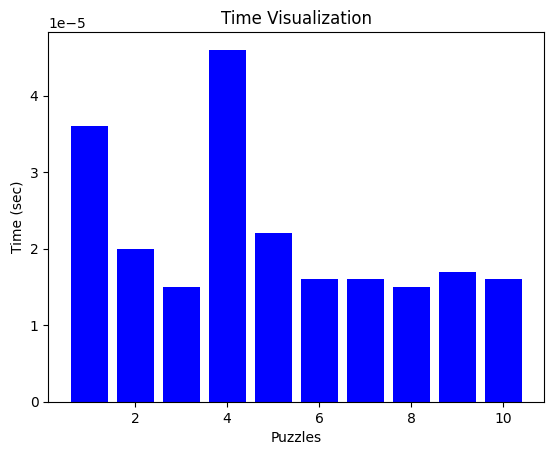

10


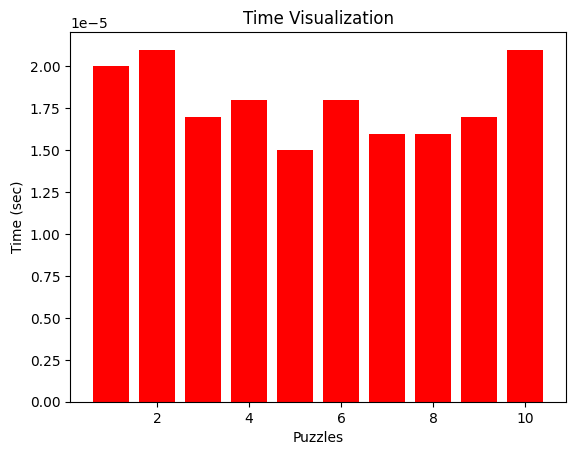

In [ ]:

from matplotlib import pyplot as plt
import numpy 
def VisualizeTime(timeV,color):
  bins=[] 
  for i in range(1,11):
    bins.append(i)

  print(len(bins))

  plt.bar(bins, timeV,color=color)
  plt.title('Time Visualization')
  plt.xlabel('Puzzles')
  plt.ylabel('Time (sec)')
  plt.show()


VisualizeTime(timeVE,'blue')
VisualizeTime(timeVH,'red')

Arc Consistency (AC3) with recursive backtracking

The arc_consistency() function created below implements the AC-3 algorithm, which is a domain-consistency algorithm.It is enforced by maintaining a queue of arcs and processing each arc by removing inconsistent values from the domain of one of the variables involved in the arc. The arc_consistency() function is then used to enforce local consistency constraints on the CSP, which reduces the search space for the recursive backtracking algorithm. Finally, recursive_backtracking() is used to search through the reduced search space and find a solution (or multiple solutions if multipleSolutions is set to True).

In [ ]:
# Arc Consistency
import sys
import os

py_file_location = "/content/drive/MyDrive/AI project"
sys.path.append(os.path.abspath(py_file_location))

from utils import generate_CSP, generate_assignment
from backtracking import recursive_backtracking
import copy


def conflicts(x, y):
    return x == y


def revise_sudoku(CSP, Xi, Xj):
    revised = False
    new_CSP = copy.deepcopy(CSP)

    for x in CSP.get("domains").get(Xi):
        broken = False

        for y in CSP.get("domains").get(Xj):
            if not conflicts(x, y):
                broken = True
                break

        if not broken:
            new_CSP.get("domains").get(Xi).remove(x)
            revised = True

    return revised, new_CSP


def arc_consistency(CSP, revise = revise_sudoku):
    queue = [(Xi, Xj) for Xi in CSP.get("variables") for Xj in CSP.get("neighbors").get(Xi)]

    while len(queue) != 0:
        Xi, Xj = queue.pop(0)

        revise_state, new_CSP = revise(CSP, Xi, Xj)
        if revise_state: # the domain of Xi has been changed
            if len(new_CSP.get("domains").get(Xi)) == 0:
                return False, new_CSP

            for xk in new_CSP.get("neighbors").get(Xi):
                if xk != Xj:
                    queue.append((xk, Xi))

            CSP = new_CSP

    return True, CSP


def solve(grid_string, multipleSolutions = False):
    CSP = generate_CSP(grid_string)
    assignment = generate_assignment(CSP)
    solutions = []

    is_arc_consistent, new_csp = arc_consistency(CSP)

    if (is_arc_consistent):
        recursive_backtracking(assignment, new_csp, solutions, multipleSolutions)

    return solutions, new_csp


Arc consistency takes string as input but the puzzle we have is in a list format. So we need to change the format accordingly.

In [ ]:
def ConvertIntoString(puzzle):

  stringConvert=""""""
  for i in puzzle:
    for x,j in enumerate(i):
      stringConvert+=str(j)+" "
      #print(x)
      if(x==8):
        stringConvert+="\n"
  #print(stringConvert)
  return stringConvert


In [ ]:
from utils import generate_sudoku_string
def printSolutions(solutions, CSP):
    if len(solutions) == 0:
        print("No solution found\n")
    else:
        for solution in solutions:
            print(generate_sudoku_string(solution, CSP))
            print()


stringConvert=""""""
puzzle = [    [0, 0, 0, 6, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 7, 5, 0, 0, 0],
    [0, 9, 0, 0, 0, 0, 0, 3, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

for i in puzzle:
  for x,j in enumerate(i):
    stringConvert+=str(j)+" "
    #print(x)
    if(x==8):
      stringConvert+="\n"
print(stringConvert)

grid_string = """
    5 3 0 0 7 0 0 0 0
    6 0 0 1 9 5 0 0 0
    0 9 8 0 0 0 0 6 0
    8 0 0 0 6 0 0 0 3
    4 0 0 8 0 3 0 0 1
    7 0 0 0 2 0 0 0 6
    0 6 0 0 0 0 2 8 0
    0 0 0 4 1 9 0 0 5
    0 0 0 0 8 0 0 7 9
    """
print("arc consistency\n")
#printSolutions(*solve(stringConvert))

Printing the solution and time for Easy puzzles


In [ ]:
# for Arc Consistency
import time
from utils import generate_sudoku_string

def printSolutions(solutions, CSP):
    if len(solutions) == 0:
        print("No solution found\n")
    else:
        for solution in solutions:
            print(generate_sudoku_string(solution, CSP))
            print()


# Now using the dataset for hard, do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVE=[]
x=0
for puzzle in easy:
  # covert the inputs into the valid strings
  stringConvert=""""""
  for i in puzzle:
    for x,j in enumerate(i):
      stringConvert+=str(j)+" "
      #print(x)
      if(x==8):
        stringConvert+="\n"
  print(stringConvert)
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  printSolutions(*solve(stringConvert))
  end_time = time.time()
  timeVE.append(round(end_time - start_time,6))
  #print("Time taken:",timeVE[x] , "seconds")
  #printFwdIteration()

print(timeVE)


1 0 0 5 0 3 7 0 0 
6 0 3 0 0 8 0 9 0 
0 0 0 0 0 9 8 0 0 
0 1 0 0 0 0 0 0 0 
8 7 6 1 0 0 0 0 0 
0 0 0 0 0 6 0 0 0 
0 0 0 0 0 0 0 0 7 
0 8 0 9 0 7 6 0 4 
7 0 0 0 6 0 3 1 2 

1 9 8 5 4 3 7 2 6
6 4 3 2 7 8 5 9 1
5 2 7 6 1 9 8 4 3
9 1 4 7 3 5 2 6 8
8 7 6 1 9 2 4 3 5
2 3 5 4 8 6 1 7 9
4 6 2 3 5 1 9 8 7
3 8 1 9 2 7 6 5 4
7 5 9 8 6 4 3 1 2

0 0 5 0 0 0 7 4 0 
3 0 0 6 0 0 0 1 9 
0 0 0 0 0 1 0 0 5 
0 0 0 7 0 0 0 2 0 
9 0 0 0 0 5 8 0 0 
7 0 0 8 4 0 0 0 0 
0 0 3 0 9 0 0 0 2 
0 9 0 4 0 0 0 0 0 
8 0 0 0 0 0 1 0 3 

2 1 5 9 8 3 7 4 6
3 8 7 6 5 4 2 1 9
4 6 9 2 7 1 3 8 5
5 3 8 7 1 6 9 2 4
9 4 1 3 2 5 8 6 7
7 2 6 8 4 9 5 3 1
6 5 3 1 9 8 4 7 2
1 9 2 4 3 7 6 5 8
8 7 4 5 6 2 1 9 3

0 0 0 0 0 0 0 0 5 
0 2 0 0 0 9 0 0 0 
0 9 0 0 2 0 0 0 3 
7 3 0 0 4 8 1 0 0 
0 0 0 3 6 0 0 0 0 
5 8 0 0 0 0 4 0 0 
0 1 0 0 0 3 5 8 0 
0 0 4 2 0 0 0 0 0 
0 0 9 7 8 0 0 0 2 

4 7 3 8 1 6 9 2 5
6 2 8 5 3 9 7 4 1
1 9 5 4 2 7 8 6 3
7 3 2 9 4 8 1 5 6
9 4 1 3 6 5 2 7 8
5 8 6 1 7 2 4 3 9
2 1 7 6 9 3 5 8 4
8 6 4 2 5 1 3 9 7
3 5 9 7 8 4 6 

Printing the solution for hard puzzles.


In [ ]:
# for hard
import time
from utils import generate_sudoku_string

def printSolutions(solutions, CSP):
    if len(solutions) == 0:
        print("No solution found\n")
    else:
        for solution in solutions:
            print(generate_sudoku_string(solution, CSP))
            print()


# Now using the dataset for hard, do backTracking
#Please note that the number of iterations is calculated as every move taken to fill each cell
timeVH=[]
x=0
for puzzle in hard:
  # covert the inputs into the valid strings
  stringConvert=""""""
  for i in puzzle:
    for x,j in enumerate(i):
      stringConvert+=str(j)+" "
      #print(x)
      if(x==8):
        stringConvert+="\n"
  print(stringConvert)
  # Solve the puzzle with the start and the end time
  start_time = time.time()
  printSolutions(*solve(stringConvert))
  end_time = time.time()
  timeVH.append(round(end_time - start_time,6))
  #print("Time taken:",timeVH[x] , "seconds")
  #printFwdIteration()

print(timeVH)


0 0 9 0 0 7 8 0 3 
0 0 0 0 0 0 0 0 0 
8 0 0 0 3 0 4 0 9 
1 0 4 0 0 0 0 0 0 
9 0 0 0 0 1 0 0 4 
3 6 0 0 4 2 0 0 0 
6 0 7 2 0 0 0 3 0 
0 0 0 0 0 3 9 5 0 
0 0 0 0 7 0 0 0 0 

4 5 9 1 2 7 8 6 3
7 3 6 4 8 9 2 1 5
8 2 1 5 3 6 4 7 9
1 8 4 7 9 5 3 2 6
9 7 2 3 6 1 5 8 4
3 6 5 8 4 2 7 9 1
6 9 7 2 5 4 1 3 8
2 4 8 6 1 3 9 5 7
5 1 3 9 7 8 6 4 2

4 0 0 0 0 0 0 9 0 
0 0 9 4 7 0 0 0 8 
2 0 0 0 0 0 0 5 0 
0 7 0 8 0 0 0 1 0 
0 0 8 0 5 3 0 0 7 
0 0 5 7 1 0 6 0 0 
0 0 2 0 0 0 0 0 0 
8 0 0 1 0 0 0 0 0 
0 6 0 9 8 0 0 0 0 

4 5 1 2 6 8 7 9 3
6 3 9 4 7 5 1 2 8
2 8 7 3 9 1 4 5 6
9 7 6 8 4 2 3 1 5
1 2 8 6 5 3 9 4 7
3 4 5 7 1 9 6 8 2
7 1 2 5 3 4 8 6 9
8 9 3 1 2 6 5 7 4
5 6 4 9 8 7 2 3 1

0 4 0 0 0 0 0 0 1 
0 0 0 7 0 5 0 0 0 
9 0 0 0 3 0 0 0 0 
0 0 0 0 0 1 5 0 6 
0 0 0 0 0 2 0 0 8 
0 7 9 0 0 0 0 0 0 
4 0 2 0 0 0 0 3 0 
0 0 5 3 0 0 8 0 0 
0 9 0 0 4 0 0 0 7 

5 4 3 8 2 9 7 6 1
1 2 8 7 6 5 9 4 3
9 6 7 1 3 4 2 8 5
2 3 4 9 8 1 5 7 6
6 5 1 4 7 2 3 9 8
8 7 9 6 5 3 4 1 2
4 8 2 5 1 7 6 3 9
7 1 5 3 9 6 8 2 4
3 9 6 2 4 8 1 

10


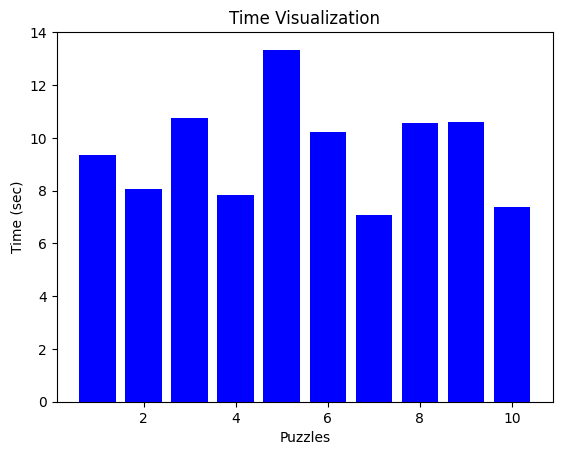

10


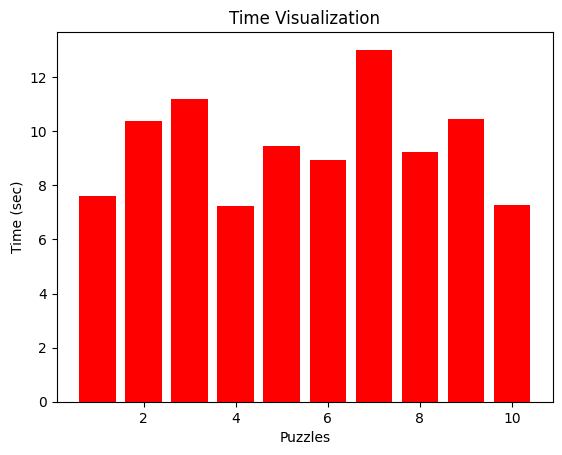

In [ ]:

from matplotlib import pyplot as plt
import numpy 
def VisualizeTime(timeV,color):
  bins=[] 
  for i in range(1,11):
    bins.append(i)

  print(len(bins))

  plt.bar(bins, timeV,color=color)
  plt.title('Time Visualization')
  plt.xlabel('Puzzles')
  plt.ylabel('Time (sec)')
  plt.show()


VisualizeTime(timeVE,'blue')
VisualizeTime(timeVH,'red')